 https://dataverse01.geus.dk/api/access/datafile/:persistentId?persistentId=doi:10.22008/FK2/F9P03L/H5MPH2 
 
 https://dataverse01.geus.dk/dataset.xhtml?persistentId=doi:10.22008/FK2/F9P03L

In [44]:
import pandas as pd
import numpy as np
import verde as vd
import pygmt
import pooch

In [2]:
fname = pooch.retrieve(
    url="https://dataverse01.geus.dk/api/access/datafile/:persistentId?persistentId=doi:10.22008/FK2/F9P03L/H5MPH2",
    known_hash="md5:76c2bbe9c34ec89a815f082f28d3112e",
    fname="Greenland_heat_flow_measurements.xlsx",
)

In [21]:
columns = {
    'Site': "site_name", 
    'Type': "location_type", 
    'Year': "year", 
    'WGS84 Latitude  (ºN)': "latitude",
    'WGS84 Longitude (ºE)': "longitude", 
    'WGS84 ± (º)': "position_error_deg", 
    'Elevation (m)': "elevation_m",
    'Elevation ± (m)': "elevation_error_m",
    'Gradient (K/km)': "geothermal_gradient_K_km", 
    'Conductivity (W/m/K)': "thermal_conductivity_W_m_K",
    'Measured Heat Flow (mW/m2)': "measured_heat_flow_mW_m2",
    'Measured Heat Flow ± (mW/m2)': "measured_heat_flow_error_mW_m2",
    'Topographic Correction (unitless)': "topographic_correction",
    'Corrected Heat Flow (mW/m2)': "heat_flow_mW_m2",
    'Corrected Heat Flow ± (mW/m2)': "heat_flow_error_mW_m2",
}
data = pd.read_excel(fname, na_values=-9999)[columns.keys()].dropna(subset=["Measured Heat Flow (mW/m2)"]).reset_index(drop=True).rename(columns=columns).copy()
data

,site_name,location_type,year,latitude,longitude,position_error_degrees,elevation_m,elevation_error_m,geothermal_gradient_K_km,thermal_conductivity_W_m_K,measured_heat_flow_mW_m2,measured_heat_flow_error_mW_m2,topographic_correction,heat_flow_mW_m2,heat_flow_error_mW_m2
0,ARLIS-10,submarine,1968,67.7183,-23.9533,0.0010,-1129.0,5,62.000000,0.870000,54.000000,2.700000,NaN,NaN,NaN
1,ARLIS-11,submarine,1968,67.6367,-24.1167,0.0010,-1075.0,5,58.000000,0.930000,54.000000,2.700000,-0.010897,54.594931,2.592925
2,ARLIS-12,submarine,1968,67.5617,-24.2683,0.0010,-1060.0,5,64.000000,0.900000,58.000000,2.900000,-0.029515,59.763931,3.217231
3,ARLIS-4,submarine,1968,68.7800,-20.7500,0.0010,-1282.0,5,121.000000,0.930000,112.000000,5.600000,NaN,NaN,NaN
4,ARLIS-5,submarine,1968,68.7100,-20.8217,0.0010,-1193.0,5,110.000000,0.920000,100.000000,5.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,GRIP,subglacial,1998,72.6000,-37.6000,0.0010,203.0,5,27.410358,2.221948,60.904395,2.000000,-0.054792,64.434935,2.633589
415,NGRIP,subglacial,2003,75.1000,-42.3000,0.0100,-121.0,5,NaN,NaN,129.000000,30.000000,-0.004116,129.533118,29.904040
416,PrinceWales05,subglacial,2005,78.3897,-80.3950,0.0001,1454.0,5,9.197022,2.354613,21.655428,2.550007,NaN,NaN,NaN
417,FladeIsblink06,subglacial,2006,81.2926,-15.7029,0.0001,750.0,10,15.352833,2.261093,34.714178,12.080010,0.004070,34.573469,12.105337


In [22]:
isna = data.heat_flow_mW_m2.isna()
data.loc[isna, "heat_flow_mW_m2"] = data.measured_heat_flow_mW_m2[isna]
data.loc[isna, "heat_flow_error_mW_m2"] = data.measured_heat_flow_error_mW_m2[isna]
data

,site_name,location_type,year,latitude,longitude,position_error_degrees,elevation_m,elevation_error_m,geothermal_gradient_K_km,thermal_conductivity_W_m_K,measured_heat_flow_mW_m2,measured_heat_flow_error_mW_m2,topographic_correction,heat_flow_mW_m2,heat_flow_error_mW_m2
0,ARLIS-10,submarine,1968,67.7183,-23.9533,0.0010,-1129.0,5,62.000000,0.870000,54.000000,2.700000,NaN,54.000000,2.700000
1,ARLIS-11,submarine,1968,67.6367,-24.1167,0.0010,-1075.0,5,58.000000,0.930000,54.000000,2.700000,-0.010897,54.594931,2.592925
2,ARLIS-12,submarine,1968,67.5617,-24.2683,0.0010,-1060.0,5,64.000000,0.900000,58.000000,2.900000,-0.029515,59.763931,3.217231
3,ARLIS-4,submarine,1968,68.7800,-20.7500,0.0010,-1282.0,5,121.000000,0.930000,112.000000,5.600000,NaN,112.000000,5.600000
4,ARLIS-5,submarine,1968,68.7100,-20.8217,0.0010,-1193.0,5,110.000000,0.920000,100.000000,5.000000,NaN,100.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,GRIP,subglacial,1998,72.6000,-37.6000,0.0010,203.0,5,27.410358,2.221948,60.904395,2.000000,-0.054792,64.434935,2.633589
415,NGRIP,subglacial,2003,75.1000,-42.3000,0.0100,-121.0,5,NaN,NaN,129.000000,30.000000,-0.004116,129.533118,29.904040
416,PrinceWales05,subglacial,2005,78.3897,-80.3950,0.0001,1454.0,5,9.197022,2.354613,21.655428,2.550007,NaN,21.655428,2.550007
417,FladeIsblink06,subglacial,2006,81.2926,-15.7029,0.0001,750.0,10,15.352833,2.261093,34.714178,12.080010,0.004070,34.573469,12.105337


In [63]:
region = vd.pad_region(vd.get_region((data.longitude, data.latitude)), 2)
region

(-101.1, 18.0152, 54.0667, 84.84)

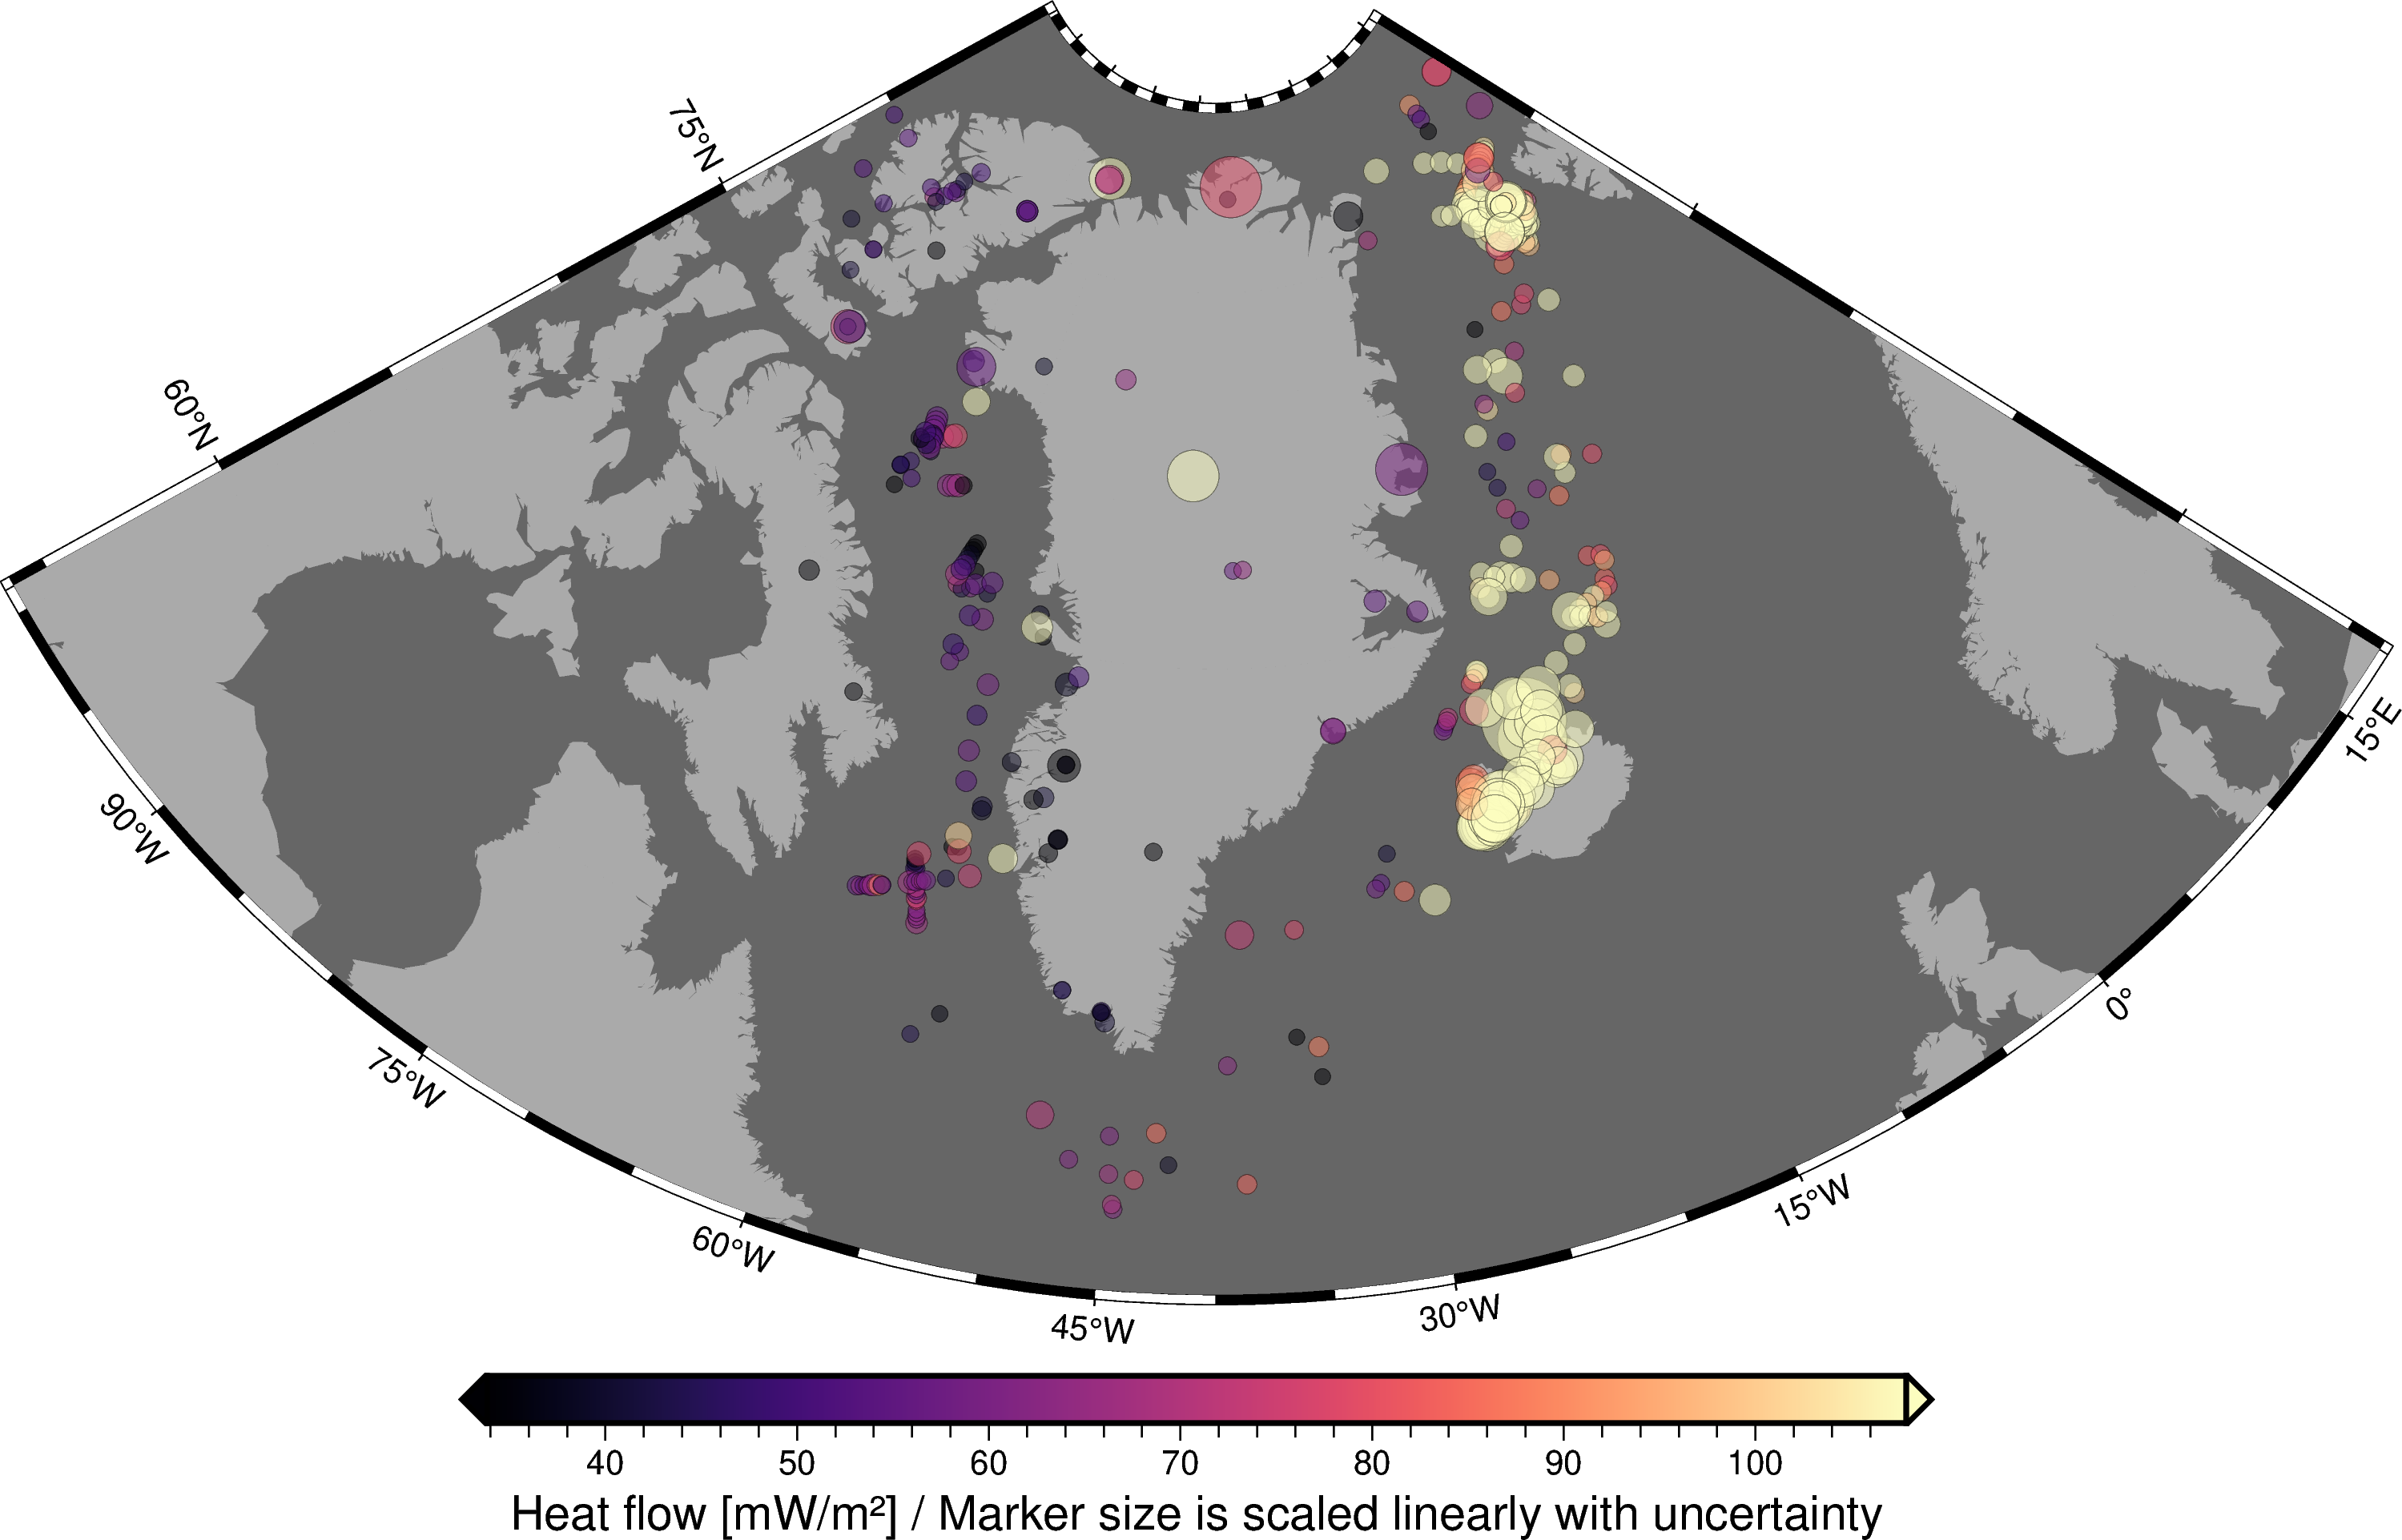

In [97]:
fig = pygmt.Figure()
fig.basemap(region=region, projection="S-40/90/25c", frame=True)
fig.coast(water="#666666", land="#aaaaaa", resolution="l", area_thresh=1e4)
scale = np.percentile(data.heat_flow_mW_m2, (5, 65))
pygmt.makecpt(cmap="magma", series=scale, background=True)
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.heat_flow_mW_m2,
    size=0.15 + 0.75 * data.heat_flow_error_mW_m2 / data.heat_flow_error_mW_m2.max(),
    style="cc",
    cmap=True,
    pen="0.1p,black,solid", 
    transparency=50,
)
fig.colorbar(
    frame='af+l"Heat flow [mW/m\\262] / Marker size is scaled linearly with uncertainty"', 
    position="JBC+h+e+w15c/0.5c",
)
fig.show(width=800)